# Project : Walmart Sales in Stormy Weather
---

## 1. Data Introduce
### 1.1 Purpose : Predict how sales of weather-sensitive products are affected by snow and rain
    

### 1.2 Data set:
   > - Train Data : 4617600 rows, 4 columns

   > - Test Data  : 526917 rows, 3 columns

   > - Weather Data : 20517 rows, 20 columns
   
   > - Key Data : 45 rows, 2 columns
   
   > - [링크 : Walmart Recruiting II: Sales in Stormy Weather](https://www.kaggle.com/c/walmart-recruiting-sales-in-stormy-weather)

### 1.3 Evaluation
   > - Root Mean Squared Logarithmic Error (RMSLE)  

$$
RMSLE = \sqrt{\frac{1}{n} \sum_{i=1}^n (\log(p_i + 1) - \log(a_i+1))^2 }
$$


In [1]:
# Import libraries
'''
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
'''
from scipy import stats
from statsmodels.graphics import utils

# Import the functions used in this project
import my_functions as mf 

from datetime import datetime

# Pretty display for notebooks
'''
%matplotlib inline
'''

# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
train = pd.read_csv("../asset/train.csv")
test = pd.read_csv("../asset/test.csv")
weather = pd.read_csv("../asset/weather.csv")
key = pd.read_csv("../asset/key.csv")
submission = pd.read_csv("../asset/sampleSubmission.csv")

# Success - Display the first record
print("Train data : ", train.shape)
print("Test  data : ", test.shape)
print("weather  data : ", weather.shape)
print("key  data : ", key.shape)
print("submission  data : ", submission.shape)

# 원본을 유지하기 위해서 카피
df_train = train.copy()
df_test = test.copy()
df_weather = weather.copy()
df_key = key.copy()
df_submission = submission.copy()

Train data :  (4617600, 4)
Test  data :  (526917, 3)
weather  data :  (20517, 20)
key  data :  (45, 2)
submission  data :  (526917, 2)


### 2. Exploratory Data Analysis

## Train data의 모습을 살펴보자

In [2]:
print("Train data : ", df_train.shape)
print("Test  data : ", df_test.shape)

Train data :  (4617600, 4)
Test  data :  (526917, 3)


In [3]:
df_train.tail()

,date,store_nbr,item_nbr,units
4617595,2014-10-31,45,107,0
4617596,2014-10-31,45,108,0
4617597,2014-10-31,45,109,0
4617598,2014-10-31,45,110,0
4617599,2014-10-31,45,111,0


In [4]:
df_train.head(1)

,date,store_nbr,item_nbr,units
0,2012-01-01,1,1,0


In [5]:
df_train.tail(1)

,date,store_nbr,item_nbr,units
4617599,2014-10-31,45,111,0


## 2012-01-01일부터 2014-10-31일 까지 총 1035일간의 데이터이다.

In [6]:
df_test.tail()

,date,store_nbr,item_nbr
526912,2014-10-26,45,107
526913,2014-10-26,45,108
526914,2014-10-26,45,109
526915,2014-10-26,45,110
526916,2014-10-26,45,111


## train 데이터의 컬럼을 살펴보면 units 컬럼 외 에는 통계값을 계산하는 것이 의미가없다.

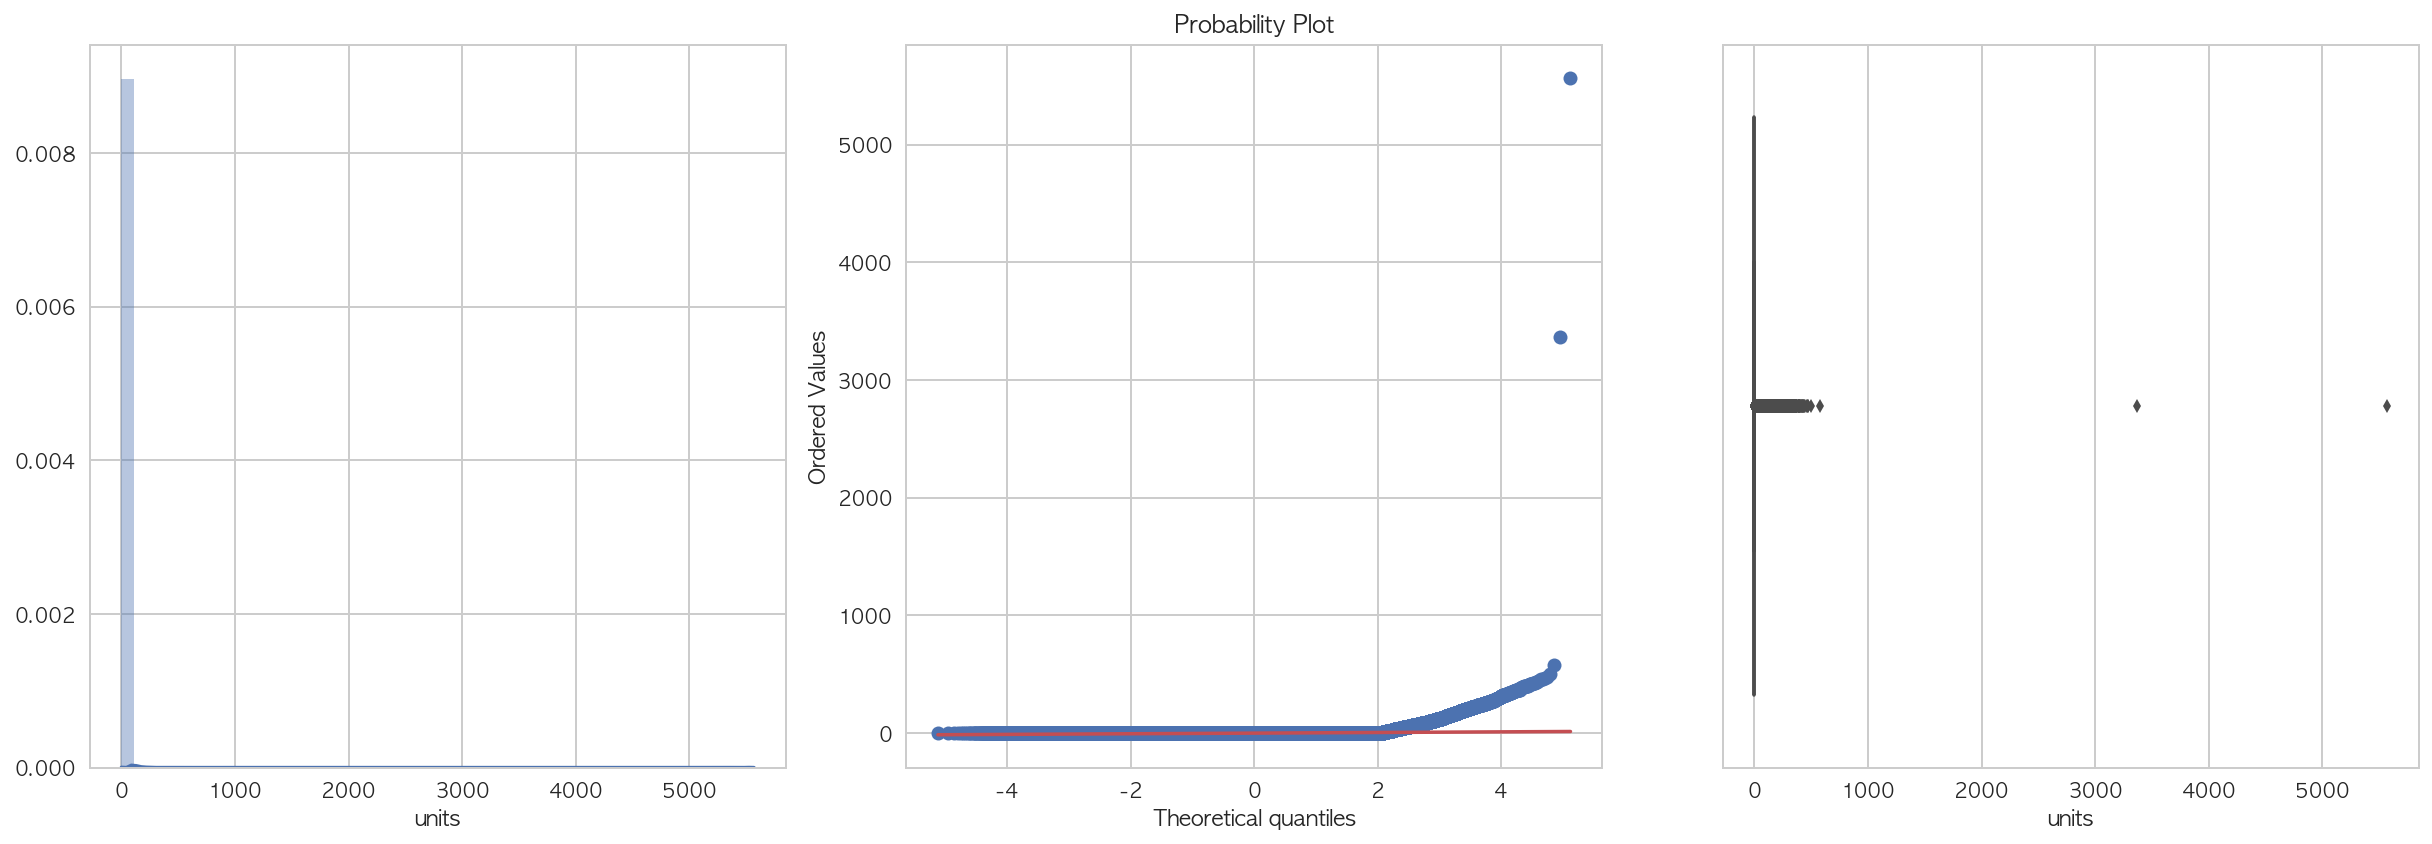

In [7]:
plt.figure(figsize=(17,6))

plt.subplot(131)
sns.distplot(df_train["units"])

plt.subplot(132)
stats.probplot(df_train["units"], plot=plt)

plt.subplot(133)
sns.boxplot(df_train["units"])
plt.tight_layout()
plt.show()

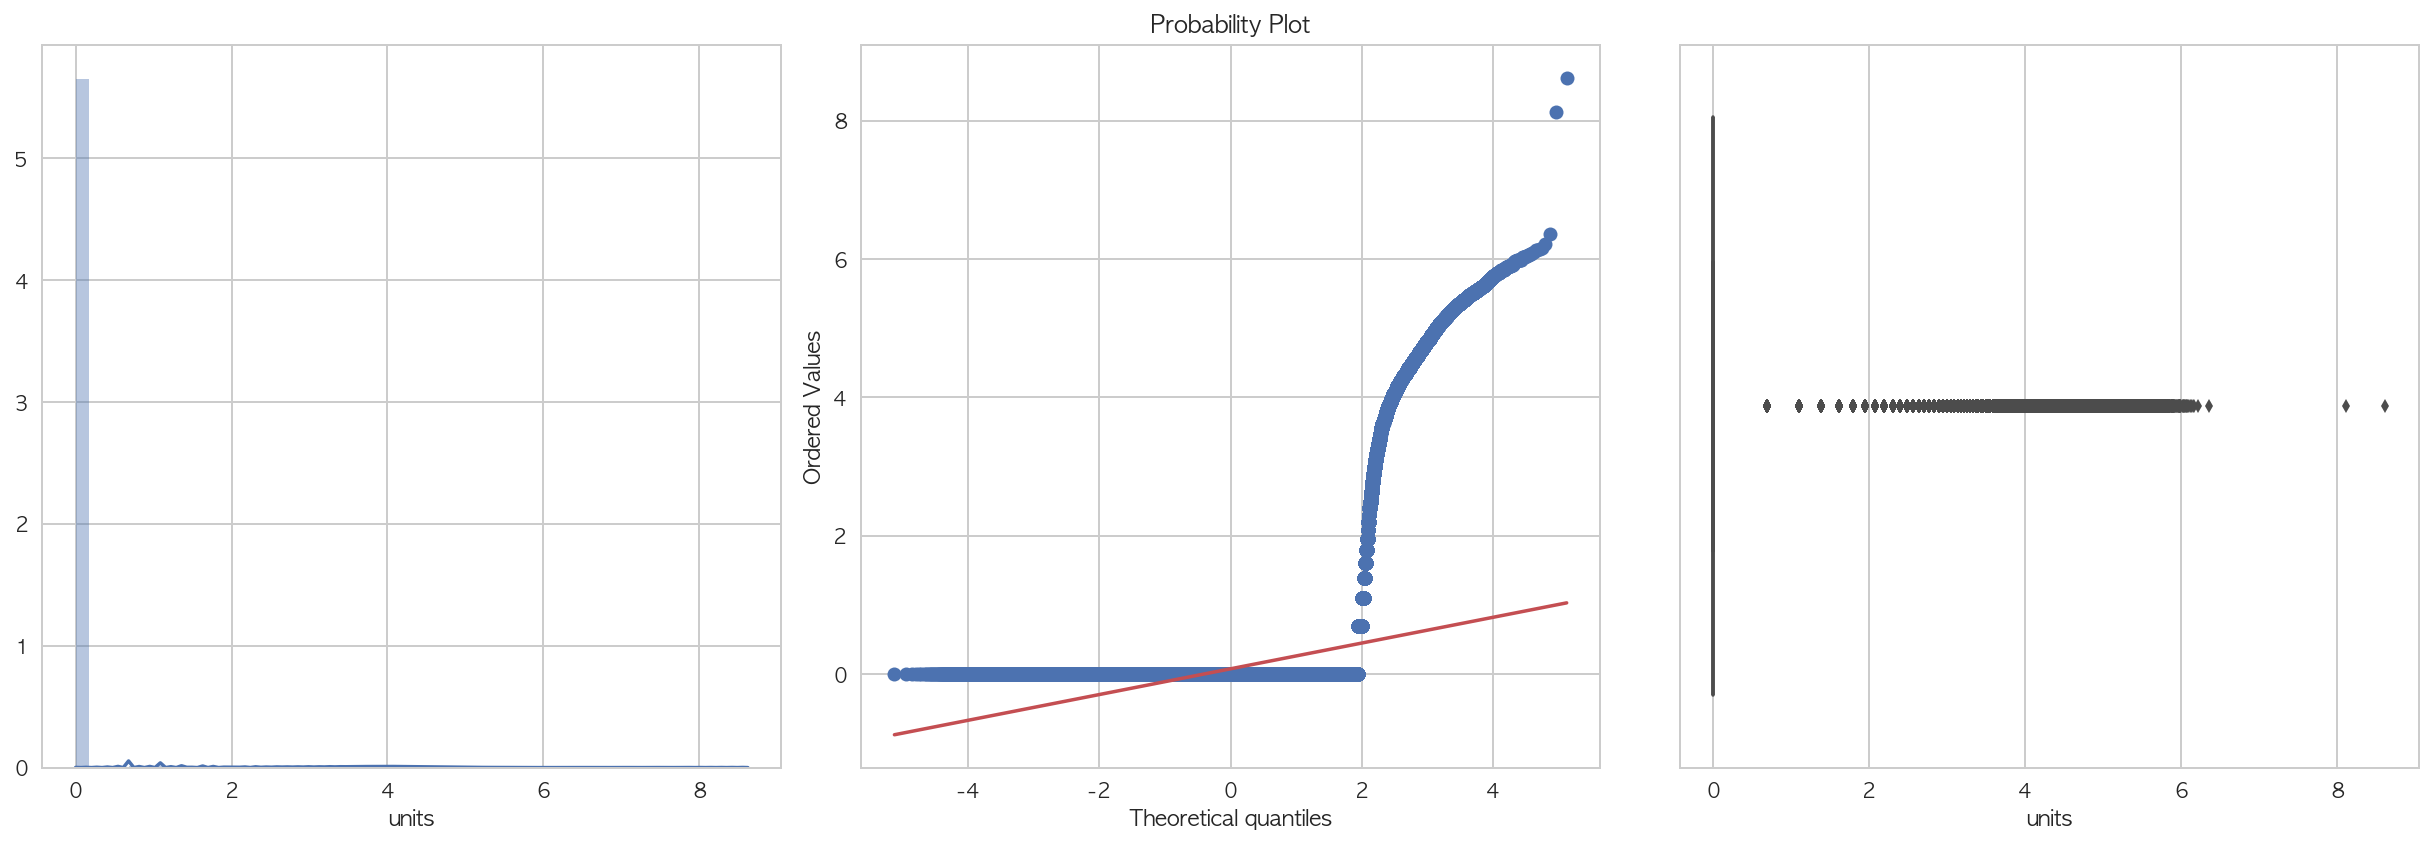

In [8]:
train_units_log1p = np.log1p(df_train["units"])

plt.figure(figsize=(17,6))

plt.subplot(131)
sns.distplot(train_units_log1p)

plt.subplot(132)
stats.probplot(train_units_log1p, plot=plt)

plt.subplot(133)
sns.boxplot(train_units_log1p)
plt.tight_layout()
plt.show()

In [9]:
df_train["units"].describe()

count    4.617600e+06
mean     9.868756e-01
std      9.875798e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.568000e+03
Name: units, dtype: float64

# units컬럼의 평균값은 0.986이지만, 이렇게 봐서는 전혀 insight를 얻을 수 없다.

In [10]:
df_unit_sales = df_train.pivot_table(["units"], ["store_nbr"], ["item_nbr"], aggfunc=np.sum)
df_unit_sales

units                                                        ...   \
item_nbr    1     2    3    4      5      6    7      8       9    10  ...    
store_nbr                                                              ...    
1             0     0    0    0      0      0    0      0   27396    0 ...    
2             0     0    0    0  55104      0    0      0       0    0 ...    
3             0  1083    0    0  56663      0    0      0       0    0 ...    
4             0     0    0    0      0      0    0      0  117123    0 ...    
5             0     0    0    0      0      0    0      0       0    0 ...    
6             0     0    0    0      0      0    0      0   50431    0 ...    
7             0     0    0    0  62230      0  721      0       0    0 ...    
8             0     0    0    0  32647      0    0      0       0    0 ...    
9             0     0    0    0  45024      0    0      0       0  745 ...    
10            0     0    0    0  61866      0    0      0       0    0 ...    
11            0     0    0    0      0      0    0      0   34103    0 ...    
12            0     0    0    0      0      0    0      0       0    0 ...    
13            0     0    0    0  67241      0    0      0       0    0 ...    
14            0     0    0    0      0      0    0      0   12164    0 ...    
15            0     0    0    0  64522      0    0      0       0    0 ...    
16            0     0    0    0      0      0    0      0       0    0 ...    
17            0     0    0    0      0      0    0      0  135367    0 ...    
18            0     0    0    0  16565      0    0      0       0    0 ...    
19            0     0    0    0      0      0    0      0       0    0 ...    
20            0     0    0    0  71034      0    0      0       0    0 ...    
21            0     0    0    0  41641      0    0      0       0    0 ...    
22            0     0    0    0      0      0    0      0   42880    0 ...    
23            0     0    0    0  28810      0    0      0       0    0 ...    
24            0     0    0    0      0  41398    0      0       0    0 ...    
25            0     0    0    0      0      0    0      0   98560    0 ...    
26            0  1482    0    0  43448      0    0      0       0    0 ...    
27            0     0    0    0      0      0    0      0   31652    0 ...    
28            0   704    0    0  33338      0    0      0       0    0 ...    
29            0     0    0    0      0      0    0  30345       0    0 ...    
30            0     0    0    0      0      0    0      0       0    0 ...    
31            0     0    0    0      0      0    0      0   48233    0 ...    
32            0     0    0    0      0      0    0      0   41888    0 ...    
33            0     0    0    0      0      0    0      0  101586    0 ...    
34            0     0    0    0      0      0    0      0   51789    0 ...    
35            0     0    0    0      0      0    0      0       0    0 ...    
36          778     0    0    0      0      0    0      0   35874    0 ...    
37            0     0    0    0  50063      0    0      0       0    0 ...    
38            0     0    0    0      0      0    0      0   66679    0 ...    
39            0     0    0    0      0      0    0      0    5057    0 ...    
40            0     0    0    0  48454      0    0      0       0    0 ...    
41            0     0    0    0      0      0    0      0       0    0 ...    
42            0     0    0    0  35178      0    0      0       0    0 ...    
43            0     0  675    0      0      0    0      0       0    0 ...    
44            0     0    0    0  32834      0    0      0       0    0 ...    
45            0     0    0  348      0      0    0      0   15833    0 ...    

                                                              
item_nbr  102  103  104  105 106  107   108   109   110  111  
store_nbr                                                     
1           0    0    0    0

## 모든 상점에서 같은 종류의 아이템들을 파는 것이 아니다.

In [11]:
item_nbrs, store_nbrs = mf.report_item_sales(df_train)

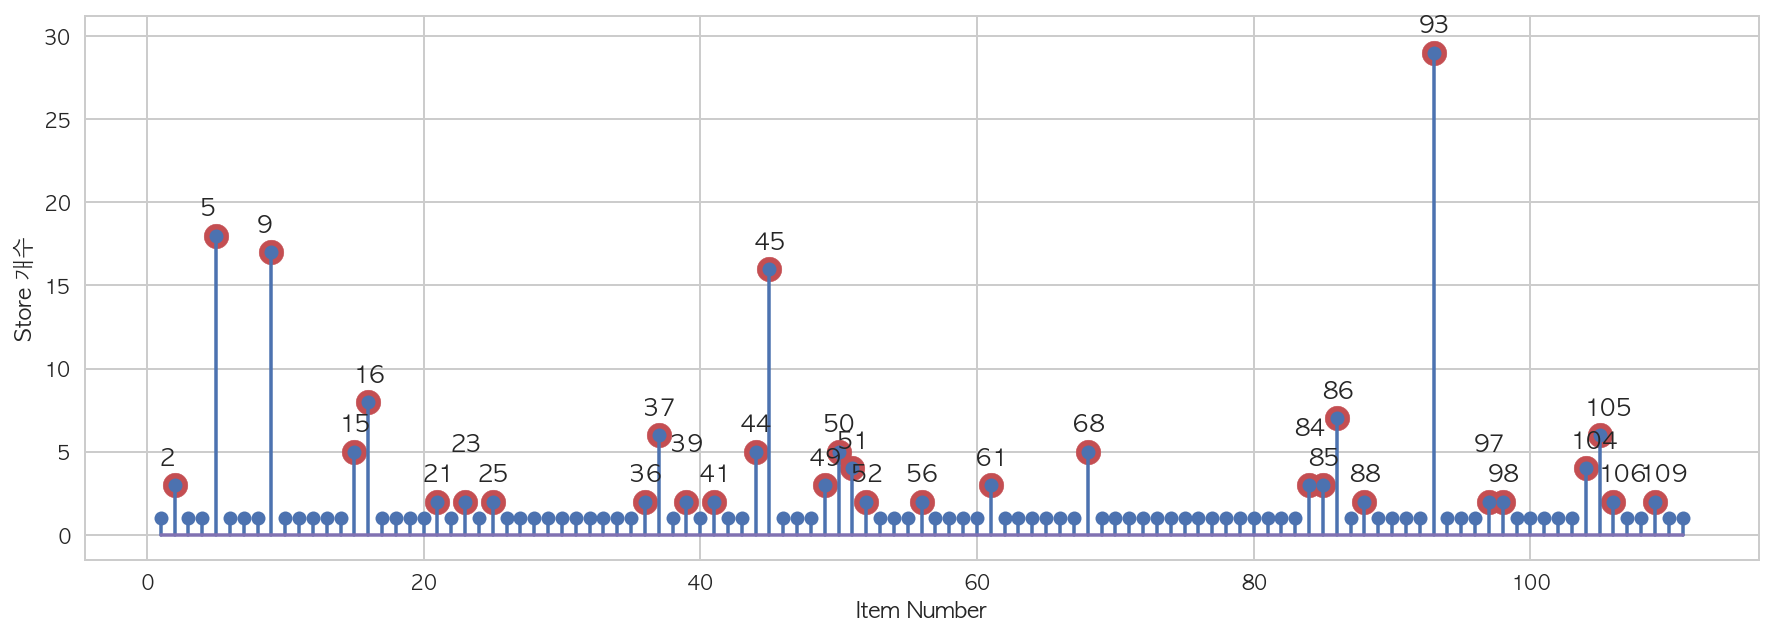

In [29]:
plt.figure(figsize=(15, 5))
item_nbrs = np.array(item_nbrs)
store_nbrs = np.array(store_nbrs)
plt.xlabel("Item Number")
plt.ylabel("Store 개수")
plt.stem(item_nbrs, store_nbrs)
ax = plt.subplot()
idx = np.where(store_nbrs > 1)
plt.scatter(item_nbrs[idx], store_nbrs[idx], s=150, c="r")
item_nbrs_ = list(idx[0])
loc = mf.setAnnotateLocation(item_nbrs_)
utils.annotate_axes(range(len(item_nbrs_)), item_nbrs[item_nbrs_],\
                    list(zip(item_nbrs[item_nbrs_], store_nbrs[item_nbrs_])), loc, size="large", ax=ax)
plt.show()

## 그나마 93번이 가장 많은 상점에서 판매하고 있는 상품이지만 29곳밖에 안된다.

In [13]:
units_sales = []
for idx in list(df_unit_sales.units.columns):
    units_sales.append(df_unit_sales.units[idx].sum())
units_sales = np.array(units_sales)

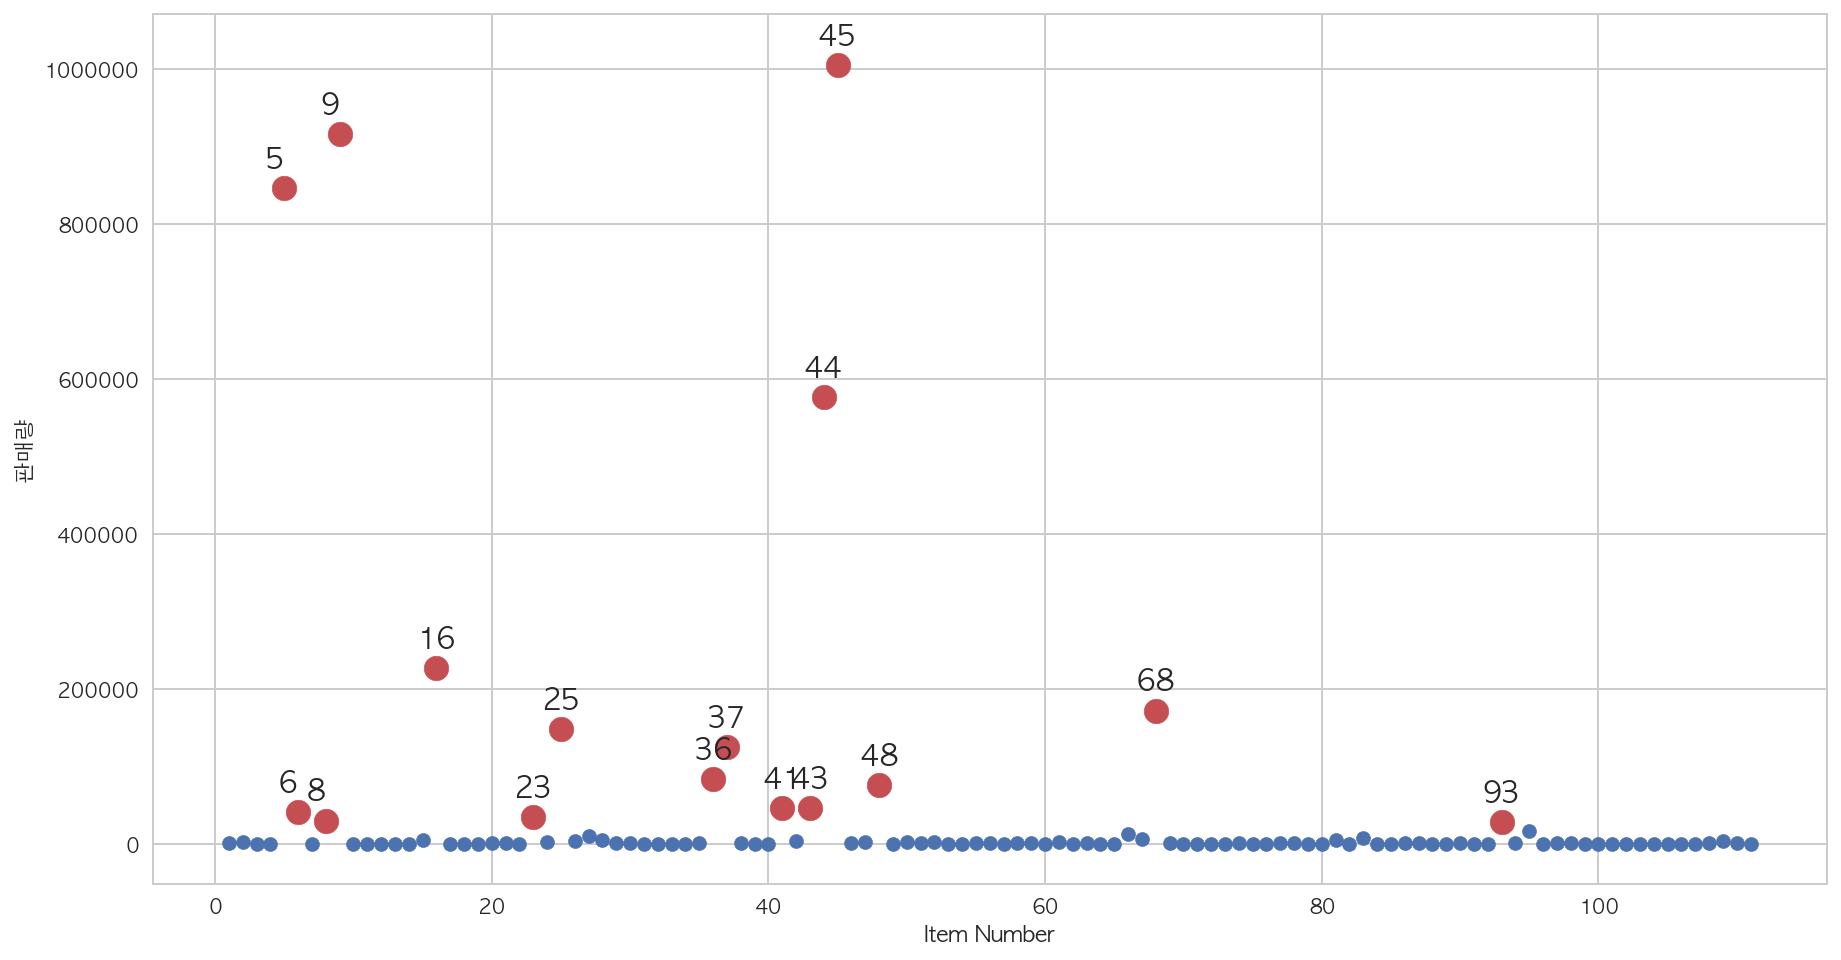

                 0
count      111.000
mean     41054.027
std     161096.077
min         31.000
25%        526.000
50%        781.000
75%       2845.000
max    1005111.000 

Skewness: 4.979809
Kurtosis: 24.816016


In [32]:
df_units_sales_sum = pd.DataFrame(units_sales)
plt.figure(figsize=(15, 8))
plt.xlabel("Item Number")
plt.ylabel("판매량")
plt.scatter(df_unit_sales.units.columns, units_sales)
ax = plt.subplot()
units_idx = np.where(units_sales > 20000)
plt.scatter(df_unit_sales.units.columns[units_idx], units_sales[units_idx], s=150, c="r")
units_nbrs = list(units_idx[0])
utils.annotate_axes(range(len(units_nbrs)), df_unit_sales.units.columns[units_nbrs],\
                    list(zip(df_unit_sales.units.columns[units_nbrs], units_sales[units_nbrs]))\
                    , [(-10, 10)] * len(units_nbrs), size="x-large", ax=ax)
plt.show()

print(round(df_units_sales_sum.describe(), 3),"\n")

print("Skewness: %f" % df_units_sales_sum.skew())
print("Kurtosis: %f" % df_units_sales_sum.kurt())

## 각 아이템별로 판매하는 상점의 수를 나누어서 같은 조건으로 만들어 비교해보았다.

In [15]:
normalized_units_sales = units_sales/store_nbrs
df_normalized_units_sales = pd.DataFrame(normalized_units_sales)

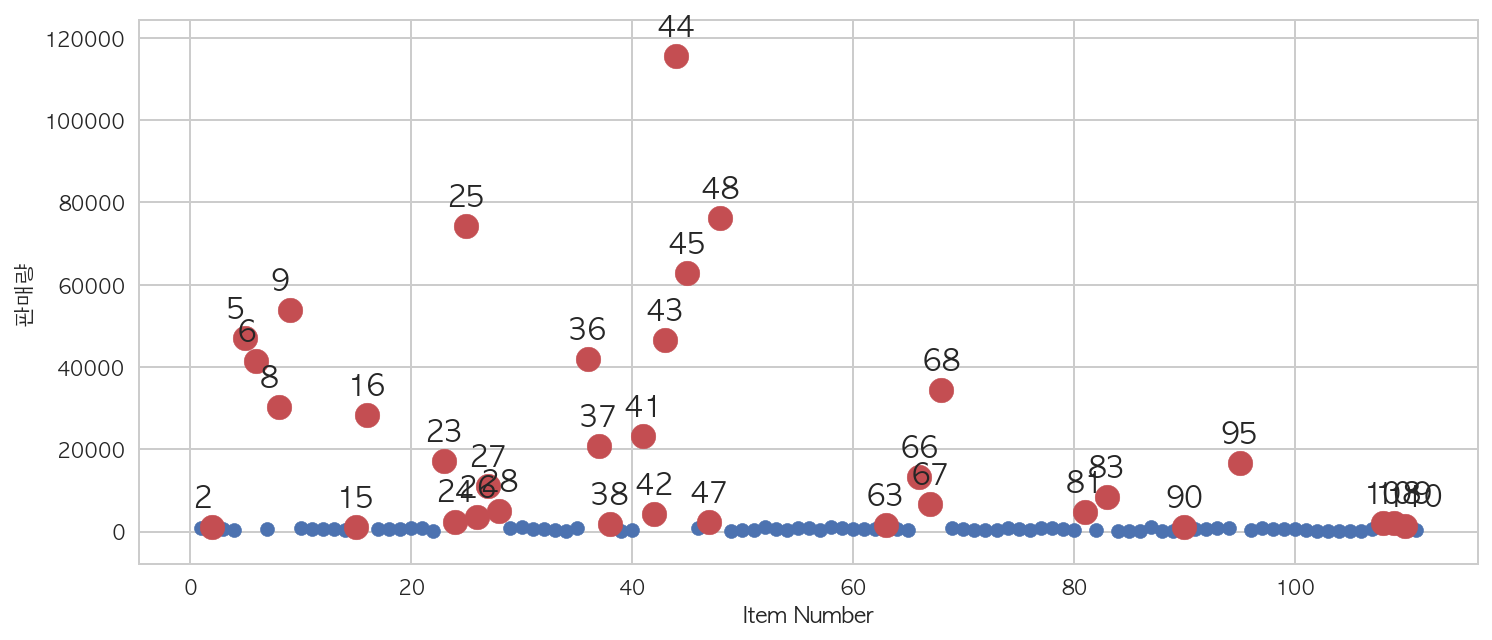

                0
count     111.000
mean     7624.411
std     18555.093
min        31.000
25%       471.900
50%       727.000
75%      1966.500
max    115438.600 

Skewness: 3.409770
Kurtosis: 13.050369


In [33]:
plt.figure(figsize=(12, 5))
plt.scatter(df_unit_sales.units.columns, normalized_units_sales)
plt.xlabel("Item Number")
plt.ylabel("판매량")
ax = plt.subplot()
units_idx = np.where(normalized_units_sales > 1035)
plt.scatter(df_unit_sales.units.columns[units_idx], normalized_units_sales[units_idx], s=150, c="r")
units_nbrs = list(units_idx[0])
utils.annotate_axes(range(len(units_nbrs)), df_unit_sales.units.columns[units_nbrs],\
                    list(zip(df_unit_sales.units.columns[units_nbrs], normalized_units_sales[units_nbrs]))\
                    , [(-10, 10)] * len(units_nbrs), size="x-large", ax=ax)
plt.show()

print(round(df_normalized_units_sales.describe(), 3),"\n")

print("Skewness: %f" % df_normalized_units_sales.skew())
print("Kurtosis: %f" % df_normalized_units_sales.kurt())

## 아이템마다 판매된 유닛수는 일정하지않다.

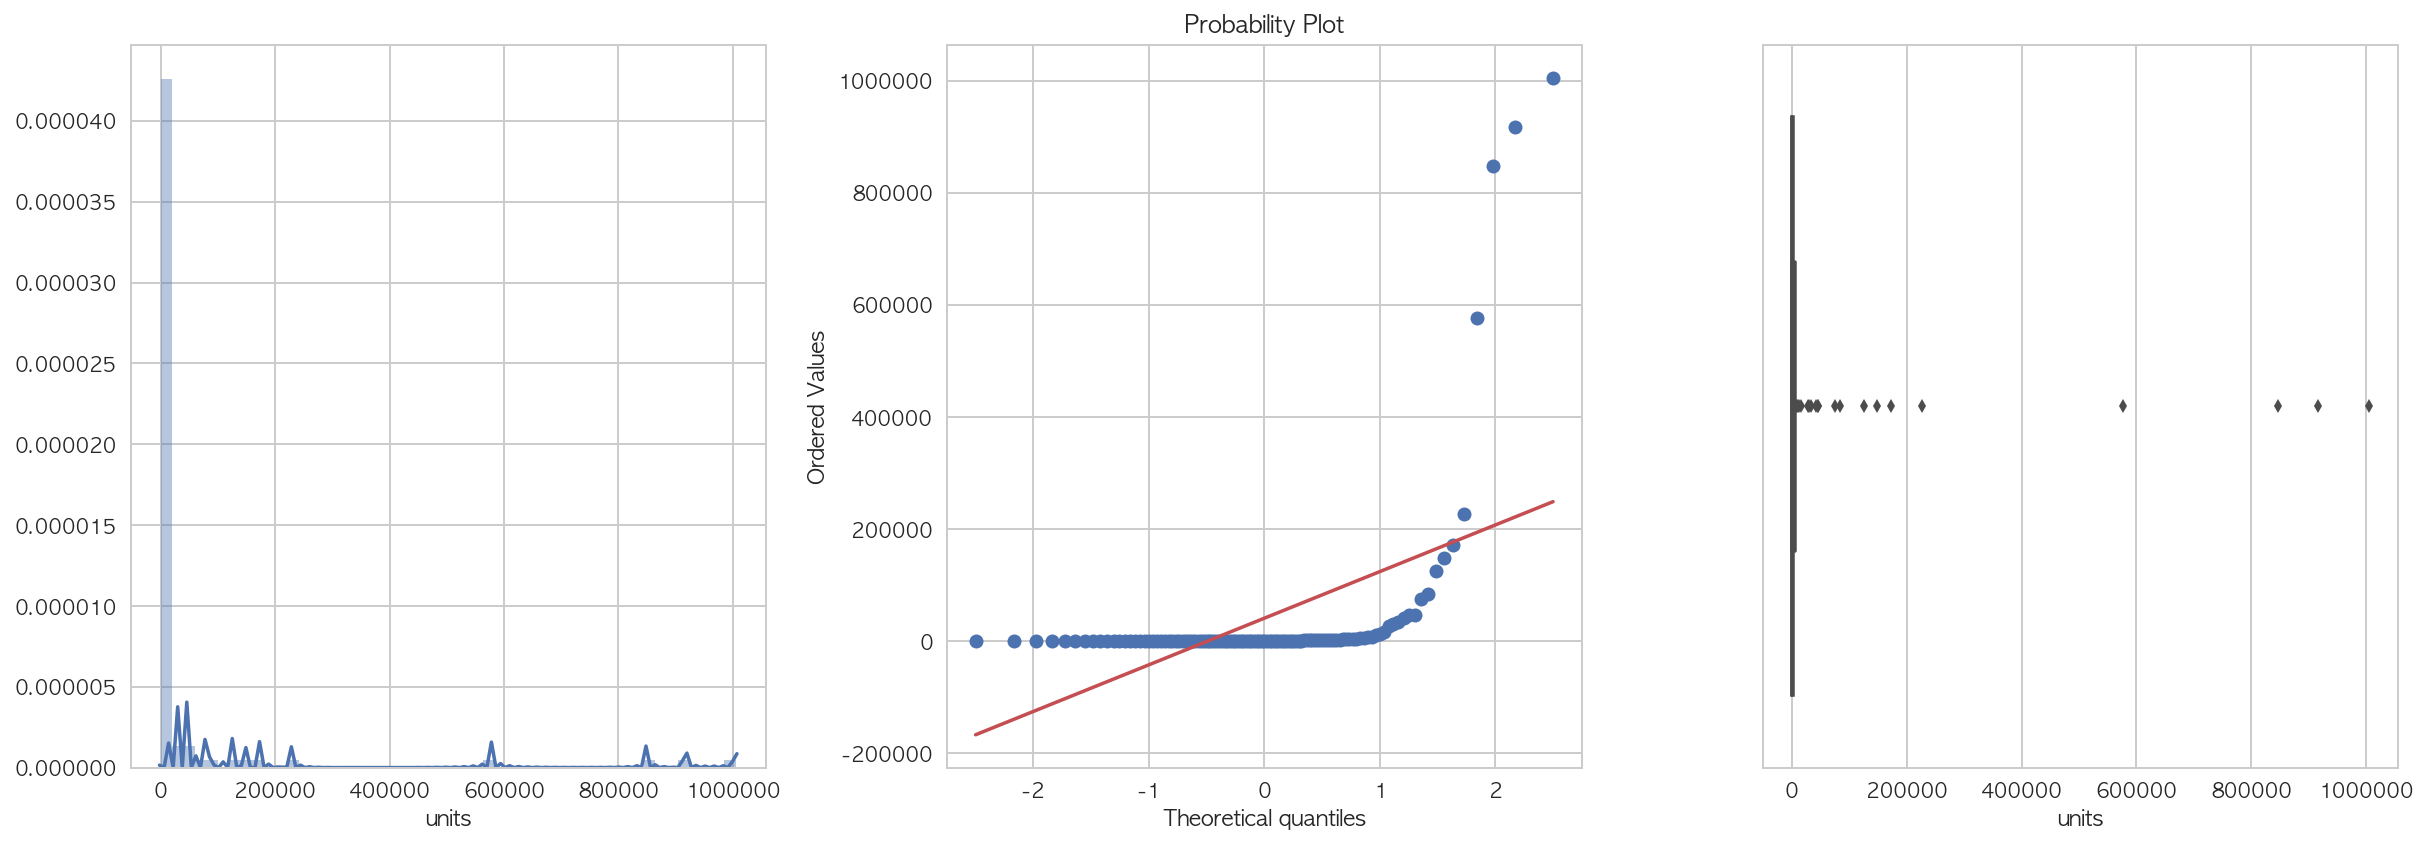

In [37]:
plt.figure(figsize=(17,6))

plt.subplot(131)
plt.xlabel("units")
sns.distplot(units_sales)

plt.subplot(132)
stats.probplot(units_sales, plot=plt)

plt.subplot(133)
plt.xlabel("units")
sns.boxplot(units_sales)
plt.tight_layout()
plt.show()

# 판매되는 유닛수는 정규분포를 따르지 않지만, Log값을 취하면 조금은 다가서는 모습을 볼 수 있다.

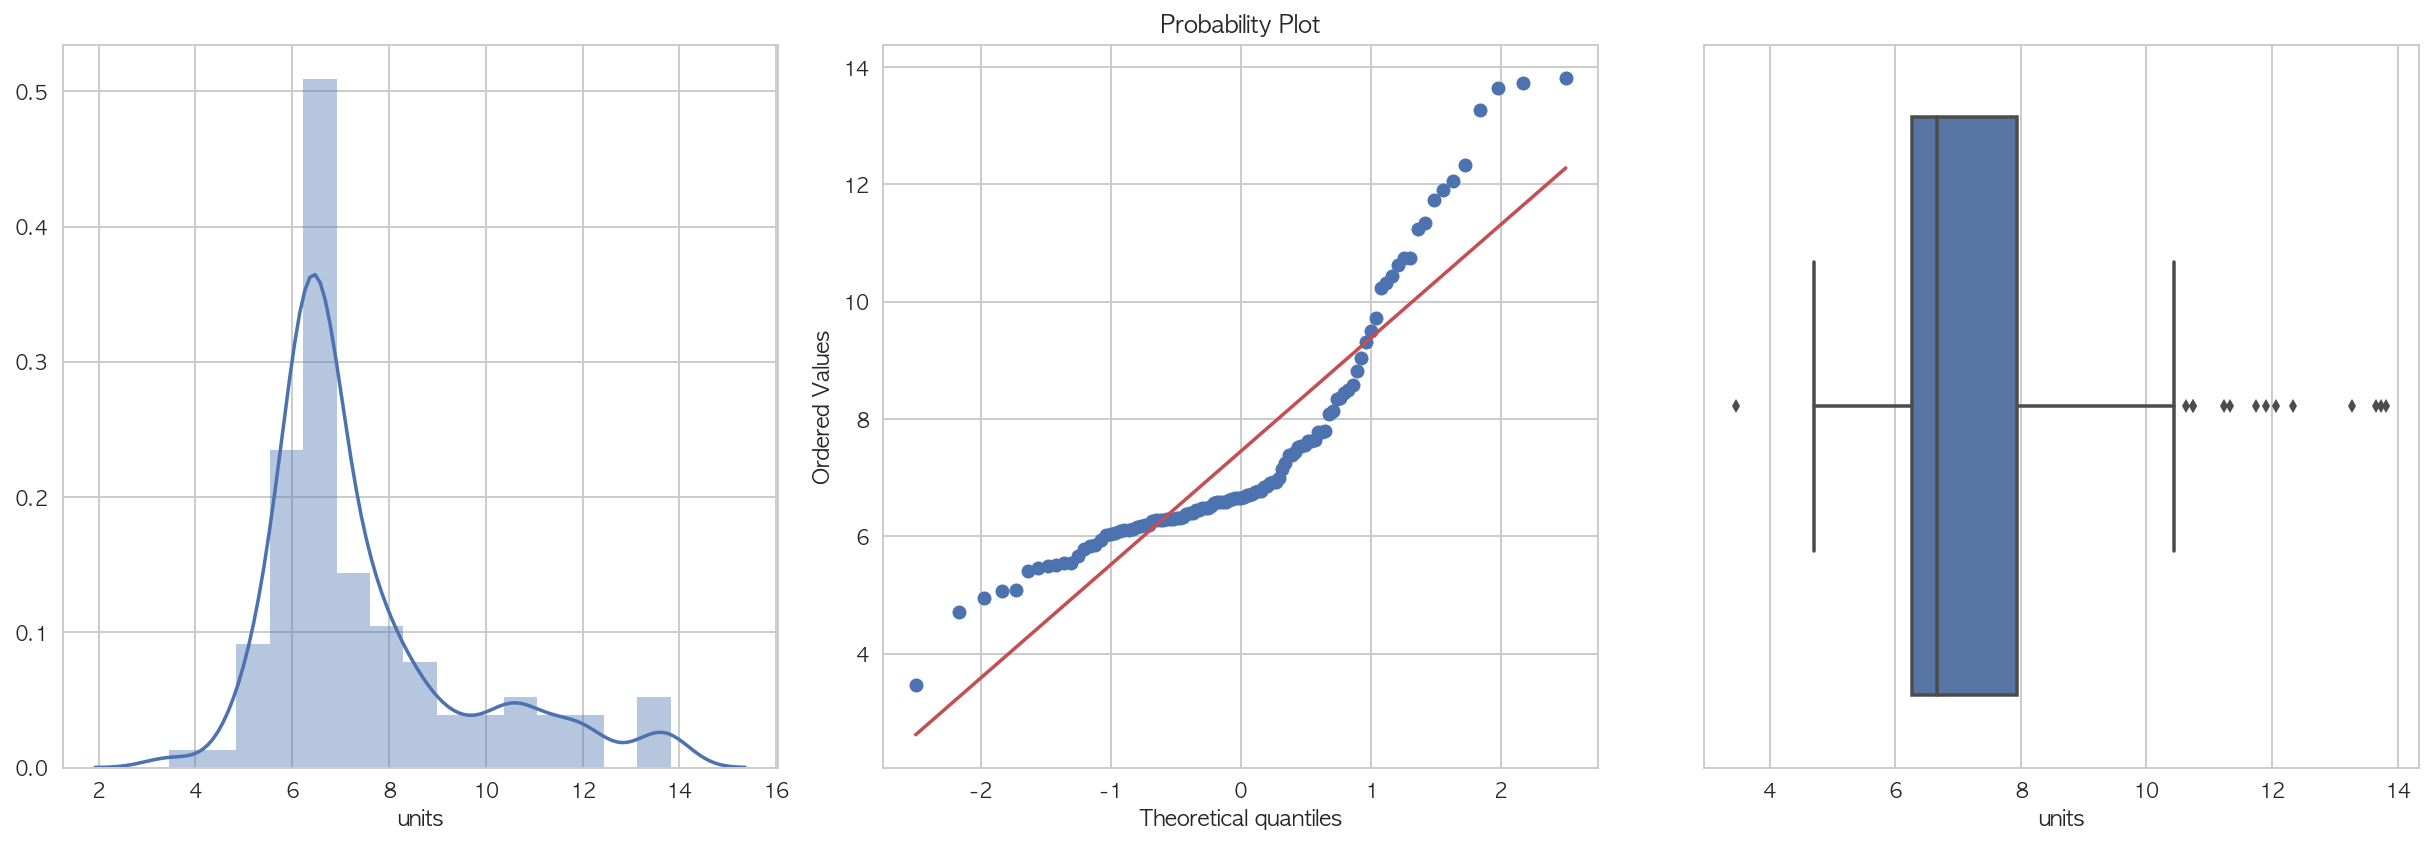

In [36]:
nomalized_SalePrice = np.log1p(units_sales)

plt.figure(figsize=(17,6))

plt.subplot(131)
plt.xlabel("units")
sns.distplot(nomalized_SalePrice)

plt.subplot(132)
stats.probplot(nomalized_SalePrice, plot=plt)

plt.subplot(133)
plt.xlabel("units")
sns.boxplot(nomalized_SalePrice)
plt.tight_layout()
plt.show()

## 2-2 Feature Type

## Weather 데이터가 우리에게 주어진 Feature Matrix이다.

In [19]:
df_weather.shape

(20517, 20)

In [20]:
df_weather.head()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,1,2012-01-01,52,31,42,M,36,40,23,0,-,-,RA FZFG BR,M,0.05,29.78,29.92,3.6,20,4.6
1,2,2012-01-01,48,33,41,16,37,39,24,0,0716,1626,RA,0.0,0.07,28.82,29.91,9.1,23,11.3
2,3,2012-01-01,55,34,45,9,24,36,20,0,0735,1720,,0.0,0.00,29.77,30.47,9.9,31,10.0
3,4,2012-01-01,63,47,55,4,28,43,10,0,0728,1742,,0.0,0.00,29.79,30.48,8.0,35,8.2
4,6,2012-01-01,63,34,49,0,31,43,16,0,0727,1742,,0.0,0.00,29.95,30.47,14.0,36,13.8


In [21]:
sorted(df_weather["station_nbr"].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

# 총 20개의 기상청의 데이터가 모아져있고, 스토어별로 각기 다른 기상청의 날씨 데이터를 따른다.

In [22]:
mf.classifyStoresByStation(df_key).sort_values(by = "station_nbr").reset_index(drop=True)

,station_nbr,store_nbr
0,1,1
1,2,16
2,3,"21, 29, 33"
3,4,8
4,5,35
5,6,"7, 13"
6,7,"3, 20, 28"
7,8,39
8,9,"4, 24"
9,10,"11, 22, 27"


In [23]:
mf.isThereNoneData(df_weather)

M Data over 60% : []
T Data over 60% : []
B Data over 60% : []


,Column,Row Count,Missing Data,M Data %,Trace Data,T Data %,Bar Data,B Data %
0,station_nbr,20517,0,0.00,0,0.00,0,0.00
1,date,20517,0,0.00,0,0.00,0,0.00
2,tmax,20517,906,4.42,0,0.00,0,0.00
3,tmin,20517,908,4.43,0,0.00,0,0.00
4,tavg,20517,1469,7.16,0,0.00,0,0.00
5,depart,20517,11511,56.10,0,0.00,0,0.00
6,dewpoint,20517,666,3.25,0,0.00,0,0.00
7,wetbulb,20517,1252,6.10,0,0.00,0,0.00
8,heat,20517,1469,7.16,0,0.00,0,0.00
9,cool,20517,1469,7.16,0,0.00,0,0.00


## 반이상의 컬럼이 Missing Data가 포함되어있다. 이 외에도 Trace data와 Bar Data가 존재한다.

In [24]:
pd.DataFrame(df_weather.groupby("station_nbr").size(), columns = ["row_nbrs"])

,row_nbrs
station_nbr,
1,1035
2,1035
3,1035
4,1035
5,852
6,1035
7,1035
8,1035
9,1035


## 스테이션별로 데이터 량을 보면 5번 스테이션만 더 적다.

In [25]:
station_5 = mf.getSpecifiedWeatherData(df_weather, 5)

In [27]:
mf.isThereNoneData(station_5, 95)

M Data over 95% : ['tmax', 'tmin', 'tavg', 'depart', 'wetbulb', 'heat', 'cool', 'snowfall', 'preciptotal', 'stnpressure', 'avgspeed']
T Data over 95% : []
B Data over 95% : []


,Column,Row Count,Missing Data,M Data %,Trace Data,T Data %,Bar Data,B Data %
0,station_nbr,852,0,0.00,0,0.0,0,0.00
1,date,852,0,0.00,0,0.0,0,0.00
2,tmax,852,822,96.48,0,0.0,0,0.00
3,tmin,852,822,96.48,0,0.0,0,0.00
4,tavg,852,822,96.48,0,0.0,0,0.00
5,depart,852,822,96.48,0,0.0,0,0.00
6,dewpoint,852,446,52.35,0,0.0,0,0.00
7,wetbulb,852,852,100.00,0,0.0,0,0.00
8,heat,852,822,96.48,0,0.0,0,0.00
9,cool,852,822,96.48,0,0.0,0,0.00


## 확인결과 19개 중에서 11개의 컬럼이 95퍼센트 이상이 Missing value이며, 4개의 컬럼이 50퍼센트 이상의 Missing value를 가지고 있다.